In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
cargotype_info = pd.read_csv('data\cargotype_info.csv', index_col='Unnamed: 0')
carton_price = pd.read_excel('data\carton_price.xlsx', index_col='Unnamed: 0')
carton = pd.read_csv('data\carton.csv') #
sku_cargotypes = pd.read_csv('data\sku_cargotypes.csv', index_col='Unnamed: 0')
data = pd.read_csv('data\data.csv', index_col='Unnamed: 0')
sku = pd.read_csv('data\sku.csv', index_col='Unnamed: 0')

In [4]:
cargotype_info.head()

,cargotype,description
0,770.0,консервы
1,301.0,тяжеловесный и крупногабаритный 20кг
2,980.0,Требует обязательной маркировки
3,985.0,"Не требует наличия маркировки, но требует выво..."
4,990.0,Потребует обязательной маркировки в ближайшем ...


In [5]:
carton_price.head()

,01.03.2023
MYA,1.109861
MYB,2.297432
MYC,3.616713
MYD,6.918375
MYE,8.062722


In [6]:
carton.head()

,CARTONTYPE,LENGTH,WIDTH,HEIGHT,DISPLAYRFPACK
0,YMA,24.7,15.0,10.0,1
1,YMC,30.0,20.0,15.0,1
2,YME,30.0,30.0,44.5,1
3,YMF,35.0,25.0,15.0,1
4,YMG,44.7,30.0,20.0,1


In [7]:
sku_cargotypes.head()

,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290


In [8]:
# Создаем датафрейм
df = pd.DataFrame({'sku': ['4862bf0e760a593b13f3f2fcf822e533', '4862bf0e760a593b13f3f2fcf822e533', '50d3c4fc66ad423b7feaadff2d682ee0', '50d3c4fc66ad423b7feaadff2d682ee0'],
                   'cargotype': [290, 901, 290, 901]})

# Группируем данные по значению в sku и создаем словарь вида {значение_в_sku: DataFrame со совпадающими значениями}
grouped = df.groupby('sku')

# Создаем пустой список для хранения новых строк
new_rows = []

# Проходимся циклом по каждому уникальному значению в sku
for sku_value in df['sku'].unique():
    # Получаем DataFrame со строками, где значение в sku равно текущему значению цикла
    rows = grouped.get_group(sku_value)
    
    # Если строк больше 1, переносим значение из cargotype к первой строке и добавляем ее в список
    if len(rows) > 1:
        new_row = rows.iloc[0].copy()
        new_row['cargotype'] = rows.iloc[1]['cargotype']
        new_rows.append(new_row)
    # Иначе оставляем первую строку без изменений
    else:
        new_rows.append(rows.iloc[0])

# Создаем новый датафрейм из списка новых строк
df_new = pd.DataFrame(new_rows)

print(df_new)

                                sku  cargotype
0  4862bf0e760a593b13f3f2fcf822e533        901
2  50d3c4fc66ad423b7feaadff2d682ee0        901


In [9]:
data.head(20)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
5,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
6,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
7,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
8,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
9,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24


In [10]:
merged_df = data.merge(sku, left_on='sku', right_on='sku', how='left')

In [11]:
merged_df

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid,a,b,c
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24,11.0,6.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325618,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743,26.0,20.0,4.0
325619,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743,26.0,20.0,4.0
325620,7,e71d2e750ce9a7a39c273c634be1665d,YMC,1,YMC,YMC,8525,YMC,3523,8525,0.284,9db21acf9e6c1a66493c246c1461f989,be7c9ad8b9430d358e6c276b94e2beff,58054d533ef06746ffd8cf99fad4a8cb,11.4,10.2,30.3
325621,7,2e2a642f611b5a6f2c404ab945fbc2a3,MYB,1,YMU,MYB,2816,YMU,552,2592,0.230,4aedb72c5662562524f6119918c7179b,be7c9ad8b9430d358e6c276b94e2beff,1666b5c878be124f05fb9a1d95dd8a68,23.0,2.0,12.0


In [12]:
sku_cargotypes

,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290
...,...,...
21053147,5786e5c2309967c64b10e443ce1a807c,691
21053148,859788a147004b9a1d24a8168460f79a,200
21053149,859788a147004b9a1d24a8168460f79a,290
21053150,859788a147004b9a1d24a8168460f79a,310


In [13]:
df = sku_cargotypes.astype(str).groupby('sku').agg(lambda x: x)

KeyboardInterrupt: 

In [84]:
df

,cargotype
sku,
024bdfbbb9aa09f64957c88d9f88f6dc,"[290, 410, 480, 485, 520, 670]"
19df1dbd95338bbfa421c80c32dd49be,"[290, 410, 480, 485, 520, 670]"
24ce9dba9f301ada55f60e25ee1498d2,"[290, 441, 490]"
2e07ca150c12f63d54085efa786940d4,"[290, 410, 480, 485, 520, 670]"
3776bc0de82c89caa5afd3b3f5ef99ab,"[291, 410, 480, 485, 670]"
387ae4cbf1196a15b586e8e43d3319a6,"[291, 410, 480, 485, 520, 670]"
39ff500f488658d0515dbaa89c91208c,"[200, 292, 301]"
40335eb4e44bc5c9a4a984b19d6302a6,"[292, 410, 480, 485, 520, 670]"
42313f77229f91f1bc8aad767bbb2b2a,"[200, 292, 300, 301]"


In [85]:
import pandas as pd

# создаем DataFrame с одним столбцом, содержащим списки разной длины
#df = pd.DataFrame({'my_list': [[1, 2], [3, 4, 5], [6]]})

# создаем функцию, которая будет разделять список на отдельные столбцы
def split_list(row):
    return pd.Series(row['cargotype'])

# применяем функцию к столбцу 'my_list' с помощью метода apply
df_new = df.apply(split_list, axis=1)



In [86]:
df_new

,0,1,2,3,4,5
sku,,,,,,
024bdfbbb9aa09f64957c88d9f88f6dc,290,410,480,485,520,670
19df1dbd95338bbfa421c80c32dd49be,290,410,480,485,520,670
24ce9dba9f301ada55f60e25ee1498d2,290,441,490,NaN,NaN,NaN
2e07ca150c12f63d54085efa786940d4,290,410,480,485,520,670
3776bc0de82c89caa5afd3b3f5ef99ab,291,410,480,485,670,NaN
387ae4cbf1196a15b586e8e43d3319a6,291,410,480,485,520,670
39ff500f488658d0515dbaa89c91208c,200,292,301,NaN,NaN,NaN
40335eb4e44bc5c9a4a984b19d6302a6,292,410,480,485,520,670
42313f77229f91f1bc8aad767bbb2b2a,200,292,300,301,NaN,NaN


In [ ]:
# добавляем новые столбцы к исходному DataFrame
df = pd.concat([df, df_new], axis=1)

# удаляем столбец 'my_list'
df.drop('cargotype', axis=1, inplace=True)

print(df)

In [38]:
def add_new_column(group_df):
    for i in range(len(group_df)):
        group_df.loc[i, 'new_column_' + str(i+1)] = group_df['value_2'].iloc[i]
    return group_df



In [ ]:
как в одно датафрейме заполнить столбец по совпадающим значениям из другого, если совпадений несколько то для каждого добавлять новый столбец

In [40]:
sku_cargotypes.groupby('sku').apply(add_new_column).reset_index(drop=True)

KeyError: 'value_2'

In [ ]:
merged_df = merged_df.groupby('key').apply(add_new_column).reset_index(drop=True)

In [35]:
data.describe()

,whs,box_num,sel_calc_cube,pack_volume,rec_calc_cube,goods_wght
count,325623.000000,325623.000000,325623.000000,3.256230e+05,325623.000000,325623.000000
mean,1.366166,2.787773,11188.402656,5.440790e+03,18253.646168,1.134705
std,2.098641,15.774209,13958.516542,2.858190e+04,26745.365119,4.090043
min,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,1.000000,3449.000000,5.000000e+02,3449.000000,0.110000
50%,0.000000,1.000000,8436.000000,1.192000e+03,8525.000000,0.300000
75%,3.000000,1.000000,15579.000000,3.154000e+03,18270.000000,0.799000
max,7.000000,235.000000,108000.000000,1.815450e+06,108000.000000,153.700000


In [22]:
data.whs.value_counts()

whs
0    203685
4     31990
3     28345
7     16987
1     16963
2     16611
6      7556
5      3486
Name: count, dtype: int64

In [34]:
data.orderkey

0         d48f3211c1ffccdc374f23139a9ab668
1         d48f3211c1ffccdc374f23139a9ab668
2         d48f3211c1ffccdc374f23139a9ab668
3         d48f3211c1ffccdc374f23139a9ab668
4         d48f3211c1ffccdc374f23139a9ab668
                        ...               
325618    0e4f34db53e37d6bf171c2e055e2b4e0
325619    0e4f34db53e37d6bf171c2e055e2b4e0
325620    e71d2e750ce9a7a39c273c634be1665d
325621    2e2a642f611b5a6f2c404ab945fbc2a3
325622    be54e183db5d75147ffcb4582c0e699b
Name: orderkey, Length: 325623, dtype: object

<Axes: >

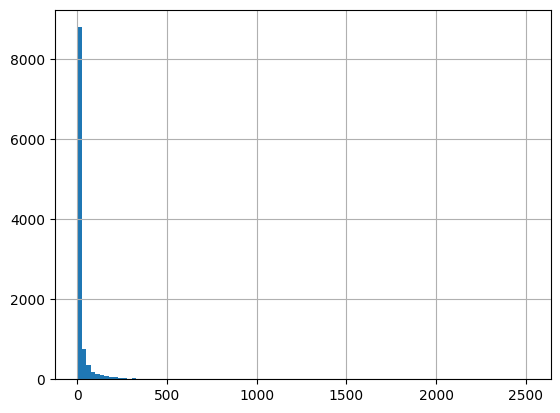

In [29]:
data.pack_volume.value_counts().hist(bins=100)

In [13]:
data.selected_cartontype.value_counts()

selected_cartontype
MYB        55937
MYC        48837
NONPACK    30497
YMC        27149
MYD        24663
YMG        23610
MYA        20401
YMF        19256
YMW        19173
YMA        15795
YME        12685
STRETCH    12465
MYE         9719
YML         3282
MYF         1350
YMX          802
YMB            2
Name: count, dtype: int64

In [26]:
data.box_num.value_counts()

box_num
1      296683
2       15199
3        4311
4        1739
5         981
        ...  
87          1
86          1
85          1
84          1
210         1
Name: count, Length: 235, dtype: int64

In [271]:
data.query('orderkey == "4862bf0e760a593b13f3f2fcf822e533"')

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid


In [ ]:
data.box

In [67]:
cargotype_info.query('description == "2023-04-11"')

,cargotype,description
64,NaN,2023-04-11
67,NaN,2023-04-11


In [68]:
cargotype_info = cargotype_info.drop_duplicates()

In [192]:
carton['vol'] = carton['LENGTH'] * carton['WIDTH'] * carton['HEIGHT']

In [194]:
carton.set_index('CARTONTYPE').sort_values('vol')

,LENGTH,WIDTH,HEIGHT,DISPLAYRFPACK,vol
CARTONTYPE,,,,,
KSD,0.0,0.0,0.00,0,0.000
STRETCH,0.0,0.0,0.00,1,0.000
NONPACK,0.0,0.0,0.00,1,0.000
MYA,15.0,20.0,3.33,1,999.000
MYF,20.0,15.0,5.00,1,1500.000
YMU,27.0,24.0,4.00,1,2592.000
MYB,22.0,32.0,4.90,1,3449.600
YMA,24.7,15.0,10.00,1,3705.000
YMV,37.0,29.0,4.00,1,4292.000


In [195]:
carton_type = carton.set_index('CARTONTYPE').sort_values('vol').drop(['DISPLAYRFPACK', 'vol'], axis=1)#.columns = carton.set_index('CARTONTYPE').drop('DISPLAYRFPACK', axis=1).columns = ['x','y','z']

In [196]:
carton_type.columns = ['x','y','z']

In [197]:
carton_type

,x,y,z
CARTONTYPE,,,
KSD,0.0,0.0,0.00
STRETCH,0.0,0.0,0.00
NONPACK,0.0,0.0,0.00
MYA,15.0,20.0,3.33
MYF,20.0,15.0,5.00
YMU,27.0,24.0,4.00
MYB,22.0,32.0,4.90
YMA,24.7,15.0,10.00
YMV,37.0,29.0,4.00


In [198]:
carton_type.T.to_dict()

{'KSD': {'x': 0.0, 'y': 0.0, 'z': 0.0},
 'STRETCH': {'x': 0.0, 'y': 0.0, 'z': 0.0},
 'NONPACK': {'x': 0.0, 'y': 0.0, 'z': 0.0},
 'MYA': {'x': 15.0, 'y': 20.0, 'z': 3.33},
 'MYF': {'x': 20.0, 'y': 15.0, 'z': 5.0},
 'YMU': {'x': 27.0, 'y': 24.0, 'z': 4.0},
 'MYB': {'x': 22.0, 'y': 32.0, 'z': 4.9},
 'YMA': {'x': 24.7, 'y': 15.0, 'z': 10.0},
 'YMV': {'x': 37.0, 'y': 29.0, 'z': 4.0},
 'MYC': {'x': 30.0, 'y': 38.0, 'z': 7.4},
 'YMC': {'x': 30.0, 'y': 20.0, 'z': 15.0},
 'YMF': {'x': 35.0, 'y': 25.0, 'z': 15.0},
 'MYD': {'x': 38.0, 'y': 50.0, 'z': 8.2},
 'YMW': {'x': 40.0, 'y': 30.0, 'z': 15.0},
 'MYE': {'x': 43.0, 'y': 63.0, 'z': 9.7},
 'YMG': {'x': 44.7, 'y': 30.0, 'z': 20.0},
 'YME': {'x': 30.0, 'y': 30.0, 'z': 44.5},
 'YMP': {'x': 70.0, 'y': 30.0, 'z': 22.0},
 'YMХ': {'x': 40.0, 'y': 18.0, 'z': 65.0},
 'YMX': {'x': 40.0, 'y': 18.0, 'z': 65.0},
 'YMO': {'x': 65.0, 'y': 45.0, 'z': 20.0},
 'YMJ': {'x': 50.0, 'y': 29.0, 'z': 48.0},
 'YMH': {'x': 42.0, 'y': 20.0, 'z': 86.0},
 'YMY': {'x': 52.0,

In [216]:
order = {"orderId": "unique_order_id",
 "items": [
    {"sku": "unique_sku_1", "count": 1, "size1": "5.1", "size2": "2.2", "size3": "5.3",
     "weight": "7.34", "type": ["2"]},
    {"sku": "unique_sku_2", "count": 3, "size1": "4", "size2": "5.23", "size3": "6.2",
     "weight": "7.45", "type": ["8", "9", "10"]},
    {"sku": "unique_sku_3", "count": 2, "size1": "11", "size2": "12.5", "size3": "13.3",
     "weight": "14.2", "type": ["15", "16"]}
   ]
}

In [1]:
%%file base.py
def base_line(order):
    '''
    Получаем order -- json запрос с перечнем товаров
    ищем минимально возможную упаковку из словаря boxes для всех товаров
    Возвращаем {"orderid": "sdfsdf", "package": "ADC", "status": "ok"}
    !!! нет проверок на типы
    !!! если есть товар который не влезет выдаст None, проверки по остальным не сделает
    '''

    def multiply_min(lst, number):
        min_val = min(lst)
        min_index = lst.index(min_val)
        lst[min_index] *= number
        return lst

    orderId = order['orderId']
    bricks = [] # размеры товаров в список
    vol_range = {} # объемы для последующего отсева наиболее объемных
    for i in order['items']:
        #sizes = (float(i['size1']), float(i['size2']), float(i['size3'])) * i['count']
        sizes = (float(i['size1']), float(i['size2']), float(i['size3']))  # * i['count']
        sizes = multiply_min(list(sizes), i['count'])
        vol_range[i['sku']] = float(i['size1']) * float(i['size2']) * float(i['size3'])
        bricks.append(sizes)
        # for j in range(i['count']):
        #
    # размеры коробок
    boxes = {
        'KSD': {'x': 0.0, 'y': 0.0, 'z': 0.0},
        'STRETCH': {'x': 0.0, 'y': 0.0, 'z': 0.0},
        'NONPACK': {'x': 0.0, 'y': 0.0, 'z': 0.0},
        'MYA': {'x': 15.0, 'y': 20.0, 'z': 3.33},
        'MYF': {'x': 20.0, 'y': 15.0, 'z': 5.0},
        'YMU': {'x': 27.0, 'y': 24.0, 'z': 4.0},
        'MYB': {'x': 22.0, 'y': 32.0, 'z': 4.9},
        'YMA': {'x': 24.7, 'y': 15.0, 'z': 10.0},
        'YMV': {'x': 37.0, 'y': 29.0, 'z': 4.0},
        'MYC': {'x': 30.0, 'y': 38.0, 'z': 7.4},
        'YMC': {'x': 30.0, 'y': 20.0, 'z': 15.0},
        'YMF': {'x': 35.0, 'y': 25.0, 'z': 15.0},
        'MYD': {'x': 38.0, 'y': 50.0, 'z': 8.2},
        'YMW': {'x': 40.0, 'y': 30.0, 'z': 15.0},
        'MYE': {'x': 43.0, 'y': 63.0, 'z': 9.7},
        'YMG': {'x': 44.7, 'y': 30.0, 'z': 20.0},
        'YME': {'x': 30.0, 'y': 30.0, 'z': 44.5},
        'YMP': {'x': 70.0, 'y': 30.0, 'z': 22.0},
        'YMХ': {'x': 40.0, 'y': 18.0, 'z': 65.0},
        # 'YMX': {'x': 40.0, 'y': 18.0, 'z': 65.0}, # дубль
        'YMO': {'x': 65.0, 'y': 45.0, 'z': 20.0},
        'YMJ': {'x': 50.0, 'y': 29.0, 'z': 48.0},
        'YMH': {'x': 42.0, 'y': 20.0, 'z': 86.0},
        'YMY': {'x': 52.0, 'y': 20.0, 'z': 70.0},
        'YML': {'x': 60.0, 'y': 40.0, 'z': 45.0},
        'YMN': {'x': 60.0, 'y': 60.0, 'z': 40.0},
        'YMQ': {'x': 70.0, 'y': 60.0, 'z': 40.0},
        'YMS': {'x': 89.5, 'y': 59.5, 'z': 49.5},
        'YMR': {'x': 80.0, 'y': 60.0, 'z': 80.0}
    }

    def is_fitting(box, bricks):
        for brick in bricks:
            if box['x'] < brick[0] or box['y'] < brick[1] or box['z'] < brick[2]:
                return False
            box = {
                'x': max(box['x'] - brick[0], 0),
                'y': max(box['y'] - brick[1], 0),
                'z': max(box['z'] - brick[2], 0)
            }
        return True

    def find_box(bricks, boxes):
        min_box = None
        min_vol = float('inf')
        for box_name, box in boxes.items():
            if is_fitting(box, bricks):
                vol = box['x'] * box['y'] * box['z']
                if vol < min_vol:
                    min_box = box_name
                    min_vol = vol
        return min_box

    def answer(orderId=orderId, min_box_name='None', status='ok'):
        answer = {}
        answer['orderid'] = orderId
        answer['package'] = min_box_name
        answer['status'] = 'ok'
        return answer

    if find_box(bricks, boxes) != 'None':
        return answer(min_box_name=find_box(bricks, boxes))
    else:
        return answer(min_box_name='STRETCH')

    #
    # while
    #     vol_range.pop(max(vol_range))

    # return min_box_name


order = {"orderId": "af49bf330e2cf16e44f0be1bdfe337bd",
 "items": [
    {"sku": "unique_sku_1", "count": 2,
     "size1": "12", "size2": "6", "size3": "3",
     "weight": "7.34", "type": ["2"]},
    {"sku": "unique_sku_2", "count": 3,
     "size1": "4", "size2": "5.23", "size3": "6.2",
     "weight": "7.45", "type": ["8", "9", "10"]},
    {"sku": "unique_sku_3", "count": 2,
     "size1": "11", "size2": "12.5", "size3": "13.3",
     "weight": "14.2", "type": ["15", "16"]}
   ]
}

print(base_line(order))

Writing base.py


In [273]:
order = {"orderId": "af49bf330e2cf16e44f0be1bdfe337bd",
 "items": [
    {"sku": "unique_sku_1", "count": 12, "size1": "12", "size2": "6", "size3": "31",
     "weight": "7.34", "type": ["2"]},
   #  {"sku": "unique_sku_2", "count": 3, "size1": "4", "size2": "5.23", "size3": "6.2",
   #   "weight": "7.45", "type": ["8", "9", "10"]},
   #  {"sku": "unique_sku_3", "count": 2, "size1": "11", "size2": "12.5", "size3": "13.3",
   #   "weight": "14.2", "type": ["15", "16"]}
   ]
}

In [268]:
base_line(order)

{'orderid': 'unique_order_id', 'package': None, 'status': 'ok'}

In [257]:
 = data['sku'].iloc[0]

In [254]:
sku

,sku,a,b,c
0,8ba57dcdba9a58b0c4edd180bef6afc9,11.0,31.0,28.0
1,d9af6ce6f9e303f4b1a8cb47cde21975,29.0,14.0,40.0
2,8b91fd242bde88f0891380506d9c3caa,12.0,13.0,35.0
3,e8af308a7659e34194770d1e3a48e144,3.0,13.0,8.0
4,dc0e2542e122731217289b8e6d3bd3f8,96.0,18.0,56.0
...,...,...,...,...
6385956,5367045e88650a12cde4803f55ed7525,0.0,0.0,0.0
6385957,8a3dcb8f1ccce02a3df63a9db0903f38,0.0,0.0,0.0
6385958,31e5069a999cd927bd623fd699957630,0.0,0.0,0.0
6385959,888059750dcd75922faf3b60144e4def,0.0,0.0,0.0


In [258]:
sku.query('sku == @ser')

,sku,a,b,c
6091591,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0


In [137]:
#bricks = [(10, 2, 3), (5, 10, 15), (10, 10, 10)]
boxes = [(50, 50, 50), (30, 30, 29), (30, 30, 30)]

def is_fitting(box, bricks):
    for brick in bricks:
        if box[0] < brick[0] or box[1] < brick[1] or box[2] < brick[2]:
            return False
        box = tuple(max(x - y, 0) for x, y in zip(box, brick))
    return True

def find_box(bricks, boxes):
    min_box = None
    min_vol = float('inf')
    for box in boxes:
        if is_fitting(box, bricks):
            vol = box[0] * box[1] * box[2]
            if vol < min_vol:
                min_box = box
                min_vol = vol
    return min_box

min_box = find_box(bricks, boxes)
print(min_box)

(30, 30, 29)


box1


In [74]:
pd.DataFrame({
    'CARTONTYPE': ['Box A', 'Box B', 'Box C'],
    'LENGTH': [20, 15, 5],
    'WIDTH': [30, 20, 10],
    'HEIGHT': [40, 25, 15]
}) # размер

,CARTONTYPE,LENGTH,WIDTH,HEIGHT
0,Box A,20,30,40
1,Box B,15,20,25
2,Box C,5,10,15


In [117]:
def is_fitting(box, bricks):
    for brick in bricks:
        if box['LENGTH'] < brick[0] or box['WIDTH'] < brick[1] or box['HEIGHT'] < brick[2]:
            return False
        box = pd.Series([max(x - y, 0) for x, y in zip(box, brick)], index=box.index)
    return True

def find_box(bricks, df_boxes):
    min_box = None
    min_vol = float('inf')
    for _, box in df_boxes.iterrows():
        if is_fitting(box, bricks):
            vol = box['LENGTH'] * box['WIDTH'] * box['HEIGHT']
            if vol < min_vol:
                min_box = box['CARTONTYPE']
                min_vol = vol
    return min_box

In [76]:
bricks[:i] + bricks[i+1:]

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
df_boxes

In [127]:
import itertools

def get_brick_sizes(brick):
    return max(brick), sorted(brick)[1], sorted(brick)[0]

bricks = [(10, 20, 30), (50, 10, 15), (100, 189090090, 10)]
boxes = [(5, 5, 50), (40, 40, 40), (300, 300, 300)]

found_sizes = {}
for box_num, box in enumerate(boxes):
    for permutation in itertools.permutations(bricks):
        height = 0
        width = 0
        length = 0
        for brick in permutation:
            b_height, b_width, b_length = get_brick_sizes(brick)
            if length >= box[0]:
                continue
            if width >= box[1]:
                continue
            if height + b_height > box[2]:
                continue
            height += b_height
            if height > length:
                length = height
            else:
                width += b_width
        if length <= box[0] and width <= box[1] and height <= box[2]:
            found_sizes[box_num] = length * width * height
            break

if not found_sizes:
    print("None")
else:
    min_size = min(found_sizes.values())
    min_box = [k for k, v in found_sizes.items() if v == min_size][0]
    print(min_box)


1


In [82]:
import pandas as pd

bricks = [(10, 20, 30), (5, 10, 15), (10, 10, 10)] # размеры брусков

df_boxes = pd.DataFrame({
    'CARTONTYPE': ['Box A', 'Box B', 'Box C'],
    'LENGTH': [200, 150, 500],
    'WIDTH': [30, 20, 10],
    'HEIGHT': [40, 25, 15]
}) # размеры коробок в виде DataFrame

def is_fitting(box, bricks):
    for brick in bricks:
        if box['LENGTH'] < brick[0] or box['WIDTH'] < brick[1] or box['HEIGHT'] < brick[2]:
            return False
        box_dims = box[['LENGTH', 'WIDTH', 'HEIGHT']]
        new_box_dims = pd.Series([max(x - y, 0) for x, y in zip(box_dims, brick)])
        box[['LENGTH', 'WIDTH', 'HEIGHT']] = new_box_dims
    return True

def find_box(bricks, df_boxes):
    min_box = None
    min_vol = float('inf')
    for _, box in df_boxes.iterrows():
        if is_fitting(box, bricks):
            vol = box['LENGTH'] * box['WIDTH'] * box['HEIGHT']
            if vol < min_vol:
                min_box = box['CARTONTYPE']
                min_vol = vol
    return min_box

for i, brick in enumerate(bricks):
    fit = False
    for j in range(len(bricks)):
        if j == i:
            continue
        new_bricks = bricks[:j] + bricks[j+1:]
        if is_fitting(df_boxes.iloc[i], new_bricks):
            bricks = new_bricks
            fit = True
            break
    if not fit:
        min_box = find_box(bricks[:i] + bricks[i+1:], df_boxes)
        if min_box is None:
            print(f"None for brick {i+1}")
        else:
            print(f"{min_box} for brick {i+1}")
    else:
        i -= 1

C:\Users\user\AppData\Local\Temp\ipykernel_708\4036856751.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box[['LENGTH', 'WIDTH', 'HEIGHT']] = new_box_dims
C:\Users\user\AppData\Local\Temp\ipykernel_708\4036856751.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box[['LENGTH', 'WIDTH', 'HEIGHT']] = new_box_dims
C:\Users\user\AppData\Local\Temp\ipykernel_708\4036856751.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box[['

AttributeError: 'list' object has no attribute 'iterrows'

In [99]:
%pip install shapely


                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.4 MB/s eta 0:00:01
     -                                        0.0/1.4 MB 667.8 kB/s eta 0:00:02
     --                                       0.1/1.4 MB 491.5 kB/s eta 0:00:03
     -----                                    0.2/1.4 MB 1.2 MB/s eta 0:00:02
     -------                                  0.3/1.4 MB 1.1 MB/s eta 0:00:01
     ---------                                0.3/1.4 MB 1.2 MB/s eta 0:00:01
     -----------                              0.4/1.4 MB 1.2 MB/s eta 0:00:01
     -------------                            0.5/1.4 MB 1.2 MB/s eta 0:00:01
     --------------                           0.5/1.4 MB 1.2 MB/s eta 0:00:01
     -----------------                        0.6/1.4 MB 1.3 MB/s eta 0:00:01
     --------------------                     0.7/1.4 MB 1.4 MB/s eta 0:00:01
     ----------------------                   0.8/1.4 MB 1.4 MB/s 

In [116]:
from shapely.geometry import Polygon, MultiPoint

def minimum_bounding_rectangle(points):
    """
    Find the minimum bounding rectangle for a set of points.
    Returns a Polygon object representing the rectangle.
    """

    # Create a convex hull from the points
    hull = MultiPoint(points).convex_hull

    # Find the two points with the greatest euclidean distance
    max_dist = 0
    max_points = None
    for i in range(len(hull.exterior.coords) - 1):
        for j in range(i + 1, len(hull.exterior.coords)):
            dist = ((hull.exterior.coords[i][0] - hull.exterior.coords[j][0]) ** 2 +
                    (hull.exterior.coords[i][1] - hull.exterior.coords[j][1]) ** 2)
            if dist > max_dist:
                max_dist = dist
                max_points = (hull.exterior.coords[i], hull.exterior.coords[j])

    # Rotate the convex hull so that the two points with the greatest euclidean distance lie on the x-axis
    angle = math.atan2(max_points[1][1] - max_points[0][1], max_points[1][0] - max_points[0][0])
    rotated_hull = affinity.rotate(hull, angle)

    # Find the minimum and maximum x- and y-coordinates of the rotated convex hull
    min_x = float('inf')
    min_y = float('inf')
    max_x = float('-inf')
    max_y = float('-inf')
    for coord in rotated_hull.exterior.coords:
        x, y = coord
        if x < min_x:
            min_x = x
        if y < min_y:
            min_y = y
        if x > max_x:
            max_x = x
        if y > max_y:
            max_y = y

    # Create a rectangle from the minimum and maximum coordinates
    rectangle = Polygon([(min_x, min_y), (max_x, min_y), (max_x, max_y), (min_x, max_y)])

    # Rotate the rectangle back to its original orientation
    inverse_angle = -angle
    final_rectangle = affinity.rotate(rectangle, inverse_angle)

    return final_rectangle

In [115]:
import itertools

bricks = [(100, 20, 30), (5, 10, 15), (10, 10, 10)]
boxes = [(5, 5, 50), (30, 30, 60), (20, 20, 20)]

combinations = list(itertools.product(bricks, repeat=len(bricks)))


min_box_volume = float('inf')
min_box_index = -1
missing_brick_index = -1

for i, box in enumerate(boxes):
    for j, combination in enumerate(combinations):
        box_volume = 0
        for brick in combination:
            if any([x > y for x, y in zip(brick, box)]):
                break
            else:
                box_volume += brick[0] * brick[1] * brick[2]
        else:
            if box_volume < min_box_volume:
                min_box_volume = box_volume
                min_box_index = i
                missing_brick_index = -1
    if min_box_index != -1:
        break

if min_box_index == -1:
    print("None")
else:
    print(f"Box {min_box_index + 1}")
    for j, brick in enumerate(bricks):
        if not any([x <= y for x, y in zip(brick, boxes[min_box_index])]):
            print(f"brick{j+1} - Not in box")
            if missing_brick_index == -1:
                missing_brick_index = j
    if missing_brick_index != -1:
        print(f"Missing brick index: {missing_brick_index + 1}")

Box 2


In [111]:
import itertools

bricks = [(10, 2000000, 30000), (5, 10, 15), (10, 10, 10)]
boxes = [(50, 50, 50), (30, 30, 60), (20, 20, 20)]

combinations = list(itertools.product(bricks, repeat=len(bricks)))


min_box_volume = float('inf')
min_box_index = -1
missing_brick_indices = []

for i, box in enumerate(boxes):
    for j, combination in enumerate(combinations):
        box_volume = 0
        for k, brick in enumerate(combination):
            if any([x > y for x, y in zip(brick, box)]):
                break
            else:
                box_volume += brick[0] * brick[1] * brick[2]
        else:
            if box_volume < min_box_volume:
                min_box_volume = box_volume
                min_box_index = i
                missing_brick_indices = []
                for k, brick in enumerate(bricks):
                    if k not in [x[0] for x in combination]:
                        missing_brick_indices.append(k)
    if min_box_index != -1:
        break

if min_box_index == -1:
    print("None")
else:
    print(f"Box {min_box_index + 1}")
    for j, brick in enumerate(bricks):
        if not any([x <= y for x, y in zip(brick, boxes[min_box_index])]):
            print(f"brick{j+1} - Not in box")
            missing_brick_indices.append(j)

    if missing_brick_indices:
        print(f"Missing brick indices: {', '.join(str(x+1) for x in missing_brick_indices)}")

Box 1
Missing brick indices: 1, 2, 3


In [ ]:
sku_cargotypes.head()

In [ ]:
sku

In [ ]:
data

In [ ]:
cargotype_info

In [ ]:
cargotype_info['description'].value_counts()

In [ ]:
cargotype_info.info()

In [ ]:
cargotype_info['cargotype'].value_counts()